<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>UnSupervised Learning Project</center></h1>

## Part A

**DOMAIN: Automobile**

**CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.**

**DATA DESCRIPTION**:

* cylinders: multi-valued discrete 
    
* acceleration: continuous
    
* displacement: continuous 
    
* model year: multi-valued discrete
    
* horsepower: continuous 
    
* origin: multi-valued discrete
    
* weight: continuous
    
* car name: string (unique for each instance)
    
* mpg: continuous

**PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories**


In [97]:
# Import required Libraries
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pylab as plt
%matplotlib inline
# To build model for prediction
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [98]:
#df_car1=pd.read_csv('/content/drive/MyDrive/AIMLCourse/UnSuperVisedLearningProject/Car name.csv')
df_car1=pd.read_csv('Car name.csv')
df_car=df_car1.copy()
df_car.head()


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [99]:
df_car.shape

(398, 1)

#### Observation : 
Car name has 398 rows and one column

### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [100]:
#df_car_attr1=pd.read_json('/content/drive/MyDrive/AIMLCourse/UnSuperVisedLearningProject/Car-Attributes.json')
df_car_attr1=pd.read_json('Car-Attributes.json')
df_car_attr=df_car_attr1.copy()
df_car_attr.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [101]:
df_car_attr.shape

(398, 8)

#### Observation : 
Car Attributes has 398 rows and 8 column

### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [102]:
#  Merge both the DataFrames together to form a single DataFrame
df_car_merged=pd.concat([df_car,df_car_attr],axis=1)
df_car_merged.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [103]:
df_car_merged.shape

(398, 9)

#### Observation : 
Merged Data frame 398 rows and 9 column

In [104]:
## As car year is model year treating as catogorical variable
df_car_merged['yr']=df_car_merged['yr'].astype(object)
## Also car name we can drop
df_car_merged.drop('car_name',axis=1,inplace=True)

In [105]:
## Replace origin with mapped String
replace_struct={1: 'One', 2: 'two', 3: 'three'}
df_car_merged['origin']=df_car_merged['origin'].map(replace_struct)

In [106]:
df_car_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    object 
 7   origin  398 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 25.0+ KB


#### Observation: 
Data frame has 5 continous and 3 object type column


### Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [107]:
df_car_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8


#### Insights from the 5-point summary:
> mpg : Average mpg is 23.5 with min of 9.0 and max of 46.6. 50% of car has mpg 23 or less. There is high variation in mpg with standard daviation of 7.81

> cylinders:: Average number of cyliner in car is 5.45 . While minimum cylinder is 3 and max value of 8. Half of the cars have 4 or fewer cylinders.75% of the cars have 8 or fewer cylinders.

> displacement:: The average displacement is 193.43 . The displacement values vary widely, with a standard deviation of 104.27 cubic inches.  The minimum displacement is 68.0 .  The maximum displacement is 455.0.

> Weight: The average weight is 2970.42. The weight values have a high variability, with a standard deviation of 846.84 pounds.The minimum weight is 1613.0 . The maximum weight is 5140.0 .

> acceleration: The average acceleration is 15.57 seconds. The acceleration values have a moderate variability, with a standard deviation of 2.76 seconds. Minimum acceleration is 8.0 seconds.Maximum acceleration is 24.8 seconds.



### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [108]:
# Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

# Check for missing values
missing_percentage = (df_car_merged.isnull().sum() / len(df_car_merged)) * 100
print(missing_percentage)

mpg       0.0
cyl       0.0
disp      0.0
hp        0.0
wt        0.0
acc       0.0
yr        0.0
origin    0.0
dtype: float64


#### Observation: 

There are no missing values in Data Frame

### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [109]:
# Check duplicate values

# Check for duplicate values
df_car_merged.duplicated().sum()


0

#### Observation:
Data Frame has no duplicate values 

### Part 1.2 c - Plot a pairplot for all features.

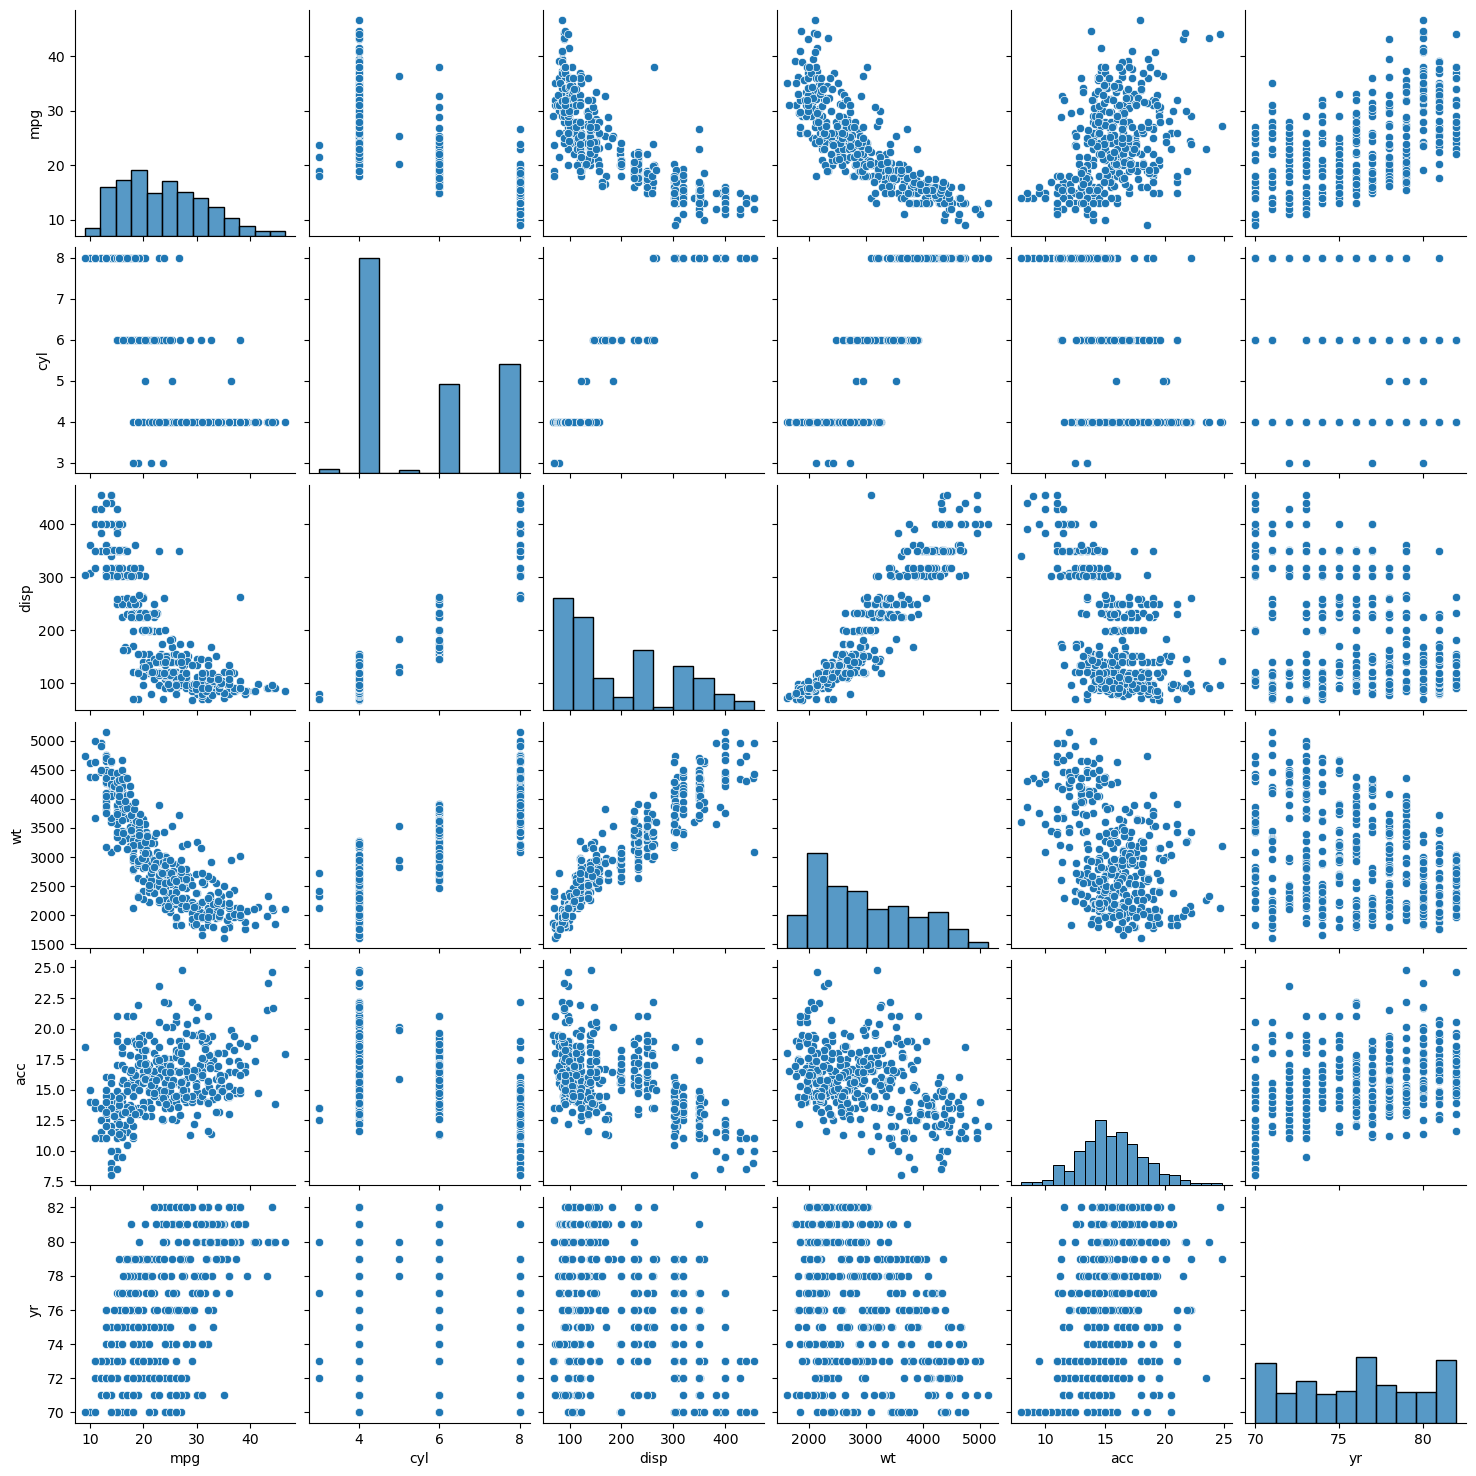

In [110]:
# Plot a pairplot for all features.

sns.pairplot(df_car_merged)
plt.show()


 ### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

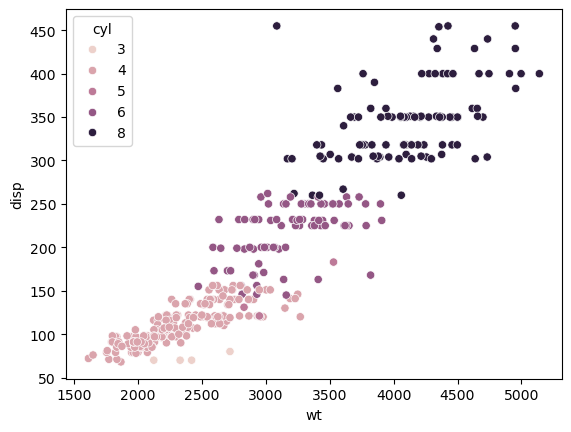

In [111]:
# Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.

sns.scatterplot(data=df_car_merged, x="wt", y="disp", hue="cyl")
plt.show()


### Part 1.2 e - Share insights for Q2.d.

#### Insights from the scatter plot:
>  We can see a positive correlation between weight ('wt') and displacement ('disp'). This suggests that heavier cars tend to have larger engines.

> Cars with more cylinders generally have higher weight and displacement. This aligns with the expectation that more cylinders contribute to both weight and engine size.

> There's a clear separation between cars with different cylinder counts. This indicates that 'cyl' is a significant factor influencing both weight and displacement.

### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

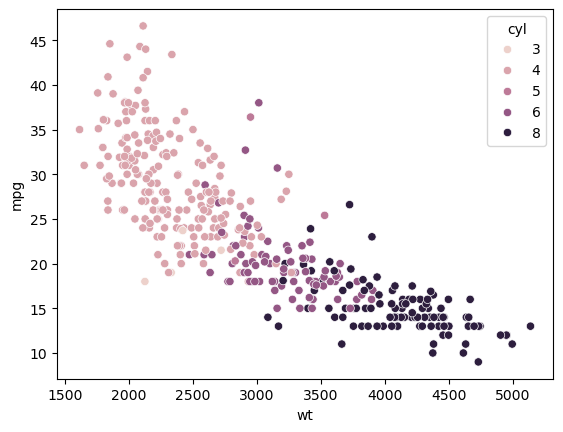

In [112]:
# Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

sns.scatterplot(data=df_car_merged, x="wt", y="mpg", hue="cyl")
plt.show()


### Part 1.2 g- Share insights for Q2.f.

#### Insights from the scatter plot:
> We can see a negative correlation between weight ('wt') and miles per gallon ('mpg'). This indicates that heavier cars tend to have lower fuel efficiency.

> Cars with more cylinders generally have lower mpg and higher weight. This aligns with the understanding that more cylinders often lead to increased fuel consumption and heavier vehicles.

> There's a noticeable clustering of data points based on the number of cylinders. This suggests that 'cyl' is a key factor affecting both weight and fuel efficiency.



### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [113]:
# Check for unexpected values in all the features and datapoints with such values.

# Check for unexpected values in categorical features
for col in df_car_merged.select_dtypes(include=['object']):
  print(f"Unique values in {col}: {df_car_merged[col].unique()}")



Unique values in hp: [130 165 150 140 198 220 215 225 190 170 160 95 97 85 88 46 87 90 113 200
 210 193 '?' 100 105 175 153 180 110 72 86 70 76 65 69 60 80 54 208 155
 112 92 145 137 158 167 94 107 230 49 75 91 122 67 83 78 52 61 93 148 129
 96 71 98 115 53 81 79 120 152 102 108 68 58 149 89 63 48 66 139 103 125
 133 138 135 142 77 62 132 84 64 74 116 82]
Unique values in yr: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Unique values in origin: ['One' 'three' 'two']


#### Observation:
We can see hp has "?" value which is not expected

In [114]:
# check hp parameter to see how many values has "?"

df_car_merged['hp'].value_counts()['?']


6

In [115]:
df_car_merged[df_car_merged['hp']=='?']

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,One
126,21.0,6,200.0,?,2875,17.0,74,One
330,40.9,4,85.0,?,1835,17.3,80,two
336,23.6,4,140.0,?,2905,14.3,80,One
354,34.5,4,100.0,?,2320,15.8,81,two
374,23.0,4,151.0,?,3035,20.5,82,One


In [116]:
# replace "?" of hp with nan

df_car_merged['hp']=df_car_merged['hp'].replace('?',np.nan)


In [117]:
# fill na with mean of hp group by number of cyliner

df_car_merged['hp'] = df_car_merged['hp'].astype(float)
df_car_merged['hp'] = df_car_merged.groupby('cyl')['hp'].transform(lambda x: x.fillna(x.mean()))


In [118]:
# Filter the DataFrame to show rows where 'hp' was originally '?'
print(df_car_merged[df_car_attr['hp'] == '?'])


      mpg  cyl   disp          hp    wt   acc  yr origin
32   25.0    4   98.0   78.281407  2046  19.0  71    One
126  21.0    6  200.0  101.506024  2875  17.0  74    One
330  40.9    4   85.0   78.281407  1835  17.3  80    two
336  23.6    4  140.0   78.281407  2905  14.3  80    One
354  34.5    4  100.0   78.281407  2320  15.8  81    two
374  23.0    4  151.0   78.281407  3035  20.5  82    One


#### Observation: 

Hp has been properly imputed with mean value of respective group of cyl

In [119]:
df_car_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    object 
 7   origin  398 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 25.0+ KB


In [120]:
# drop yr and origin column as those are categorical column

df_car_merged.drop(['yr', 'origin'], axis=1, inplace=True)


In [121]:
df_car_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.8 KB


In [122]:
# scale data using zscore

# Scale the numerical features using z-score scaling
df_car_scaled = df_car_merged.apply(zscore)
df_car_scaled.head()

,mpg,cyl,disp,hp,wt,acc
0,-0.706439,1.498191,1.090604,0.676038,0.630870,-1.295498
1,-1.090751,1.498191,1.503514,1.590766,0.854333,-1.477038
2,-0.706439,1.498191,1.196232,1.198740,0.550470,-1.658577
3,-0.962647,1.498191,1.061796,1.198740,0.546923,-1.295498
4,-0.834543,1.498191,1.042591,0.937389,0.565841,-1.840117


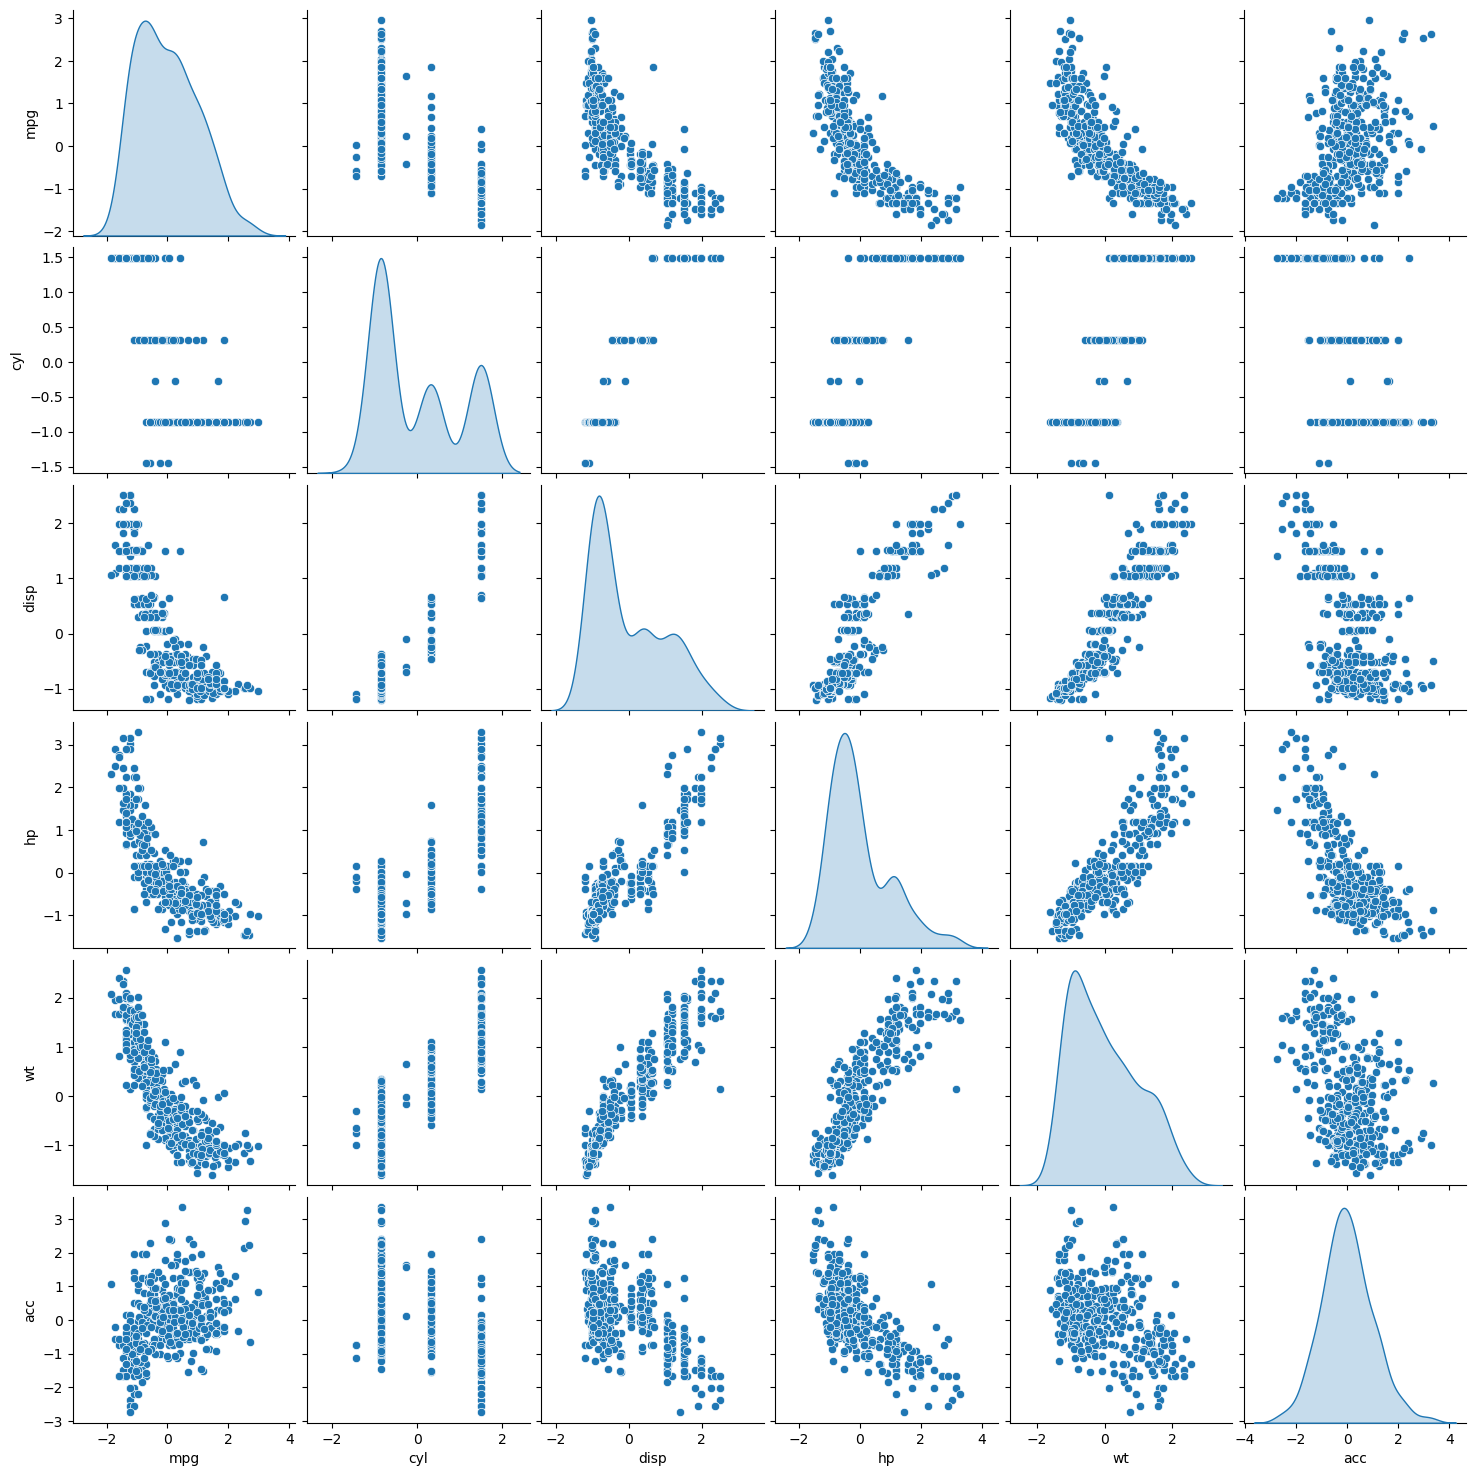

In [123]:
sns.pairplot(df_car_scaled,diag_kind='kde')
plt.show()

### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [ ]:
from sklearn.cluster import KMeans
#Apply K-Means clustering for 2 to 10 clusters
inertia_values = []
for n_clusters in range(2, 11):
 kmeans = KMeans(n_clusters=n_clusters, random_state=42)
 kmeans.fit(df_car_merged.select_dtypes(include=['number']))
 inertia_values.append(kmeans.inertia_)



In [ ]:
# #Finding optimal no. of clusters
# from scipy.spatial.distance import cdist
# clusters=range(2,11)
# meanDistortions=[]

# for k in clusters:
#     model=KMeans(n_clusters=k,random_state=42)
#     model.fit(df_car_scaled)
#     prediction=model.predict(df_car_scaled)
#     meanDistortions.append(sum(np.min(cdist(df_car_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_car_scaled.shape[0])



### Part 1.3 b - Plot a visual and find elbow point.

In [ ]:
#Plot the Elbow method to find the optimal number of clusters
plt.plot(range(2, 11), inertia_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
# # Plot the Elbow method to find the optimal number of clusters
# plt.plot(clusters, meanDistortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Average distortion')
# plt.title('Selecting k with the Elbow Method')

### Part 1.3 c - On the above visual, highlight which are the possible Elbow points.

### Observation: 

From the plot:

* k=2: There is a significant drop in distortion from k=2 to k=3.
* k=3: Another noticeable drop in distortion is seen from k=3 to k=4, though less steep than from k=2 to k=3.
* k=4: After k=4, the curve starts to flatten out more gradually.
* The most prominent elbow points in the plot are at k=3 and k=4

In [ ]:
#  We will use K from 3 to 5 and check silhouette_score to see best value of k

from sklearn.metrics import silhouette_score

# Calculate silhouette scores for clusters 3 to 5
silhouette_scores = []
for n_clusters in range(3, 6):
  model = KMeans(n_clusters=n_clusters, random_state=42)
  model.fit(df_car_scaled)
  predicted=model.predict(df_car_scaled)
  silhouette_scores.append(silhouette_score(df_car_scaled, predicted))

# Create a DataFrame to compare silhouette scores
df_silhouette = pd.DataFrame({'Clusters': range(3, 6), 'Silhouette Score': silhouette_scores})
print(df_silhouette)

### Observation: 

From above table we can see that we are getting best Silhouette  score in k=3 So we will use the same for our final model

### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [ ]:
# Let us use k=3 as our final model
final_model=KMeans(n_clusters=3,random_state=42)
final_model.fit(df_car_scaled)
prediction=final_model.predict(df_car_scaled)


In [ ]:
# calculate silhouette_score for k=3

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_car_scaled, prediction)
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)


### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [ ]:

#Append the prediction
df_car_merged["GROUP"] = prediction
df_car_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df_car_merged.sample(10)

#### Observation: 

Added Group column to see different assigned cluster to our data

In [ ]:
import matplotlib.pyplot as plt

# Determine the number of plots
num_plots = len(df_car_scaled.columns.difference(['GROUP']))
rows = 2
cols = (num_plots + 1) // rows  # Calculate the number of columns needed

# Create a figure with a larger size
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(24, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of columns to plot
columns = df_car_scaled.columns.difference(['GROUP'])

# Plot each column in a separate subplot
for i, col in enumerate(columns):
    df_car_scaled.boxplot(column=col, by='GROUP', ax=axes[i])
    axes[i].set_title(col, fontsize=16)  # Increase the title font size
    axes[i].set_xlabel('GROUP', fontsize=14)  # Increase the xlabel font size
    axes[i].tick_params(axis='x', labelsize=12)  # Increase the x-axis tick label size
    axes[i].tick_params(axis='y', labelsize=12)  # Increase the y-axis tick label size

# Remove the automatic 'Boxplot grouped by' title
plt.suptitle('')

# Adjust layout
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()


In [ ]:
# plt.figure(figsize=(24, 12))
# df_car_scaled.boxplot(by='GROUP', layout=(2, 4))
# plt.show()

#### Observation: 

From box plot we can see that data different groups are clearly separable

### Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

In [ ]:
# Visualize a scatterplot for ‘wt’ and ‘disp’ distinguished by cluster

sns.scatterplot(data=df_car_merged, x="wt", y="disp", hue="GROUP")
plt.show()


In [ ]:
# Scatter plot of 'wt' vs 'mpg', colored by cluster assignment
sns.scatterplot(data=df_car_merged, x="wt", y="mpg", hue="GROUP")
plt.title("Car Clusters Based on Weight and MPG")
plt.show()


### Observation: 

From Above Plots we can see that variable are saprable based on group 

In [ ]:
df_car_merged.sample(10)

### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to.

In [ ]:
# Define the new data point (replace with your actual values)
new_data_point = pd.DataFrame([[20, 4, 140 ,120, 2500, 15]],
                             columns=['mpg', 'cyl', 'disp','hp', 'wt', 'acc'])
print(new_data_point)


# Predict the cluster for the new data point
predicted_cluster = final_model.predict(new_data_point)

print("The new data point belongs to cluster:", predicted_cluster[0])
